In [2]:
# Libraries used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The first experiment consists of drawing conclusions about the dataset of José Ramón Cobián. The dataset contains the minimum circuits with NAND gates, with no more
than 10, that compute certain Boolean functions of 5 bits in one. The idea is to compare this dataset with a large sample of 5-bit Boolean functions randomly selected, and see if
it is possible to find a separation between both sets using the defined metrics.

In [3]:
# Import the files with the data in dataframes for its posterior analysis
dataset_df = pd.read_csv("dataset.csv")
non_dataset_df = pd.read_csv("non_dataset.csv")

# Remove the functions with 11 NAND gates
dataset_df = dataset_df[dataset_df['size'] < 11]

# Make non_dataset Dataframe of same size as dataset
non_dataset_df = non_dataset_df.head(len(dataset_df))

### 1. Test metrics individually

In order to find a possible separation between both sets of functions, we study the histograms of the dataframes. In the x-axis we represent the entanglement value and in the y-axis the
percentage of functions that have this value of entanglement.

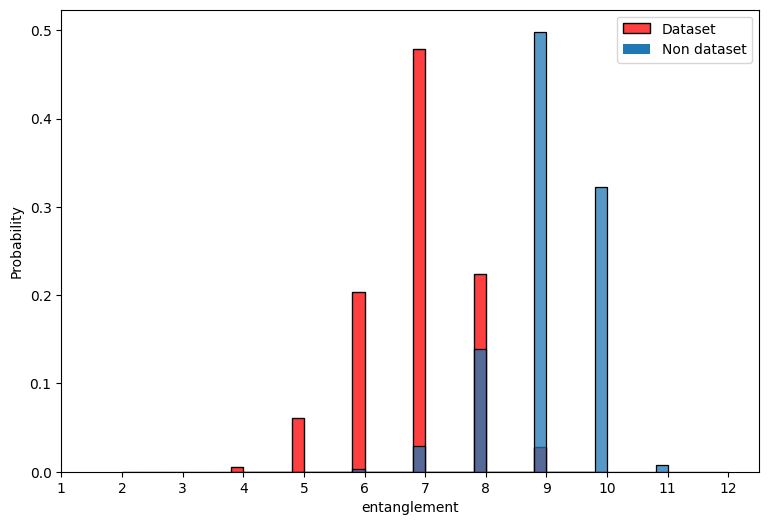

In [30]:
# Compare functions that are in the dataset and outside with histograms
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df, x='entanglement', color='red', stat='probability', binwidth=0.2, ax=ax)
sns.histplot(data=non_dataset_df, x='entanglement', stat='probability', binwidth=0.2, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])
ax.set_xticks(np.arange(1, 13, 1))

plt.show()

Same idea for all approaches of equanimity.

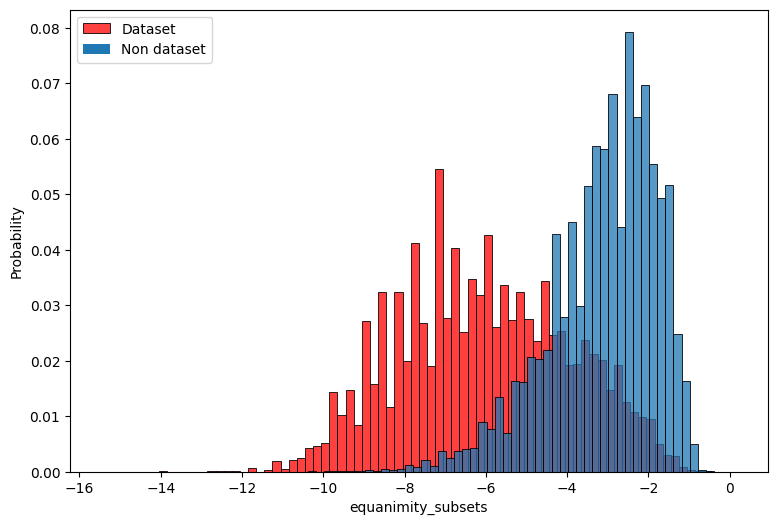

In [31]:
# Compare functions that are in the dataset and outside with histograms
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df, x='equanimity_subsets', color='red', stat='probability', binwidth=0.2, ax=ax)
sns.histplot(data=non_dataset_df, x='equanimity_subsets', stat='probability', binwidth=0.2, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])

plt.show()

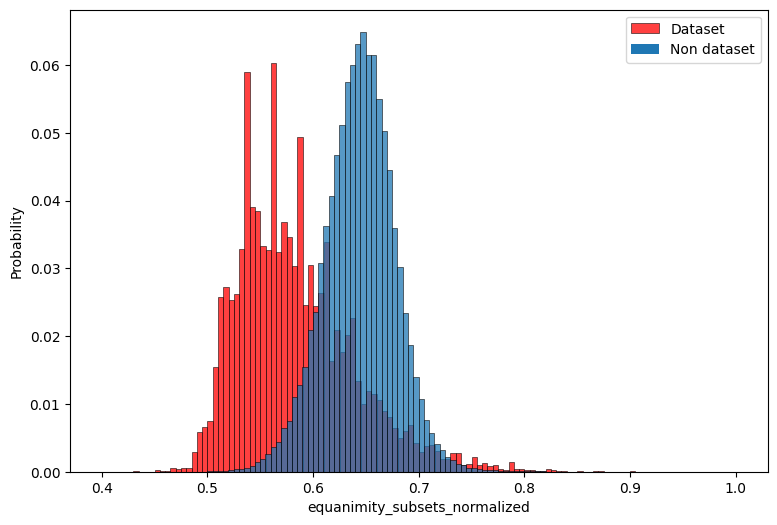

In [33]:
# Compare functions that are in the dataset and outside with histograms
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df, x='equanimity_subsets_normalized', color='red', stat='probability', binwidth=0.005, ax=ax)
sns.histplot(data=non_dataset_df, x='equanimity_subsets_normalized', stat='probability', binwidth=0.005, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])

plt.show()

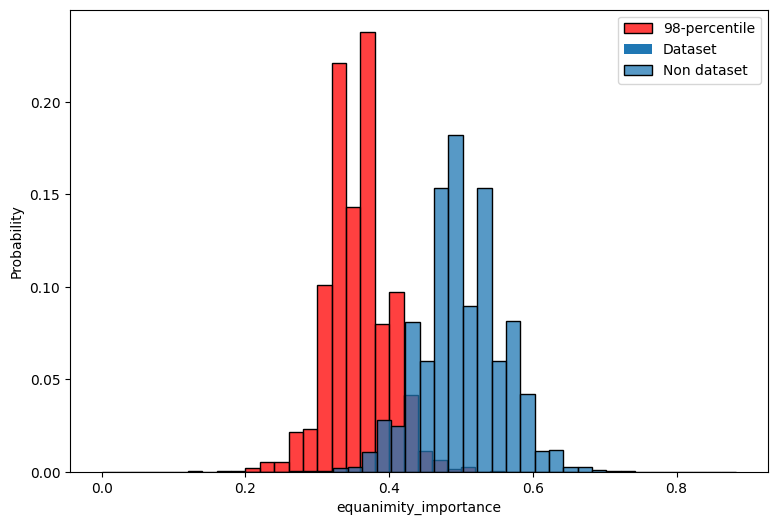

In [34]:
# Compare functions that are in the dataset and outside with histograms
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df, x='equanimity_importance', color='red', stat='probability', binwidth=0.02, ax=ax)
sns.histplot(data=non_dataset_df, x='equanimity_importance', stat='probability', binwidth=0.02, ax=ax)

ax.legend(labels=['98-percentile', 'Dataset', 'Non dataset'])

plt.show()

First, we proceed to calculate the equanimity value, whereby only 2% of all the functions studied (both in and outside the dataset) exhibit a higher value.

In [4]:
# Concatenate both dataframes
functions = pd.concat([dataset_df, non_dataset_df])

# Store the percentages
percentile_equanimity_importance = np.percentile(functions['equanimity_importance'], 98)
percentile_equanimity_subsets = np.percentile(functions['equanimity_subsets'], 98)
percentile_equanimity_subsets_normalized = np.percentile(functions['equanimity_subsets_normalized'], 98)

# Show the results
print('Equanimity based on the importance of variables:', percentile_equanimity_importance)
print('Equanimity based on subsets:', percentile_equanimity_subsets)
print('Equanimity based on subsets normalized:', percentile_equanimity_subsets_normalized)

Equanimity based on the importance of variables: 0.6
Equanimity based on subsets: -1.32559
Equanimity based on subsets normalized: 0.715625


We can repeat the above representations of equanimity with the percentile

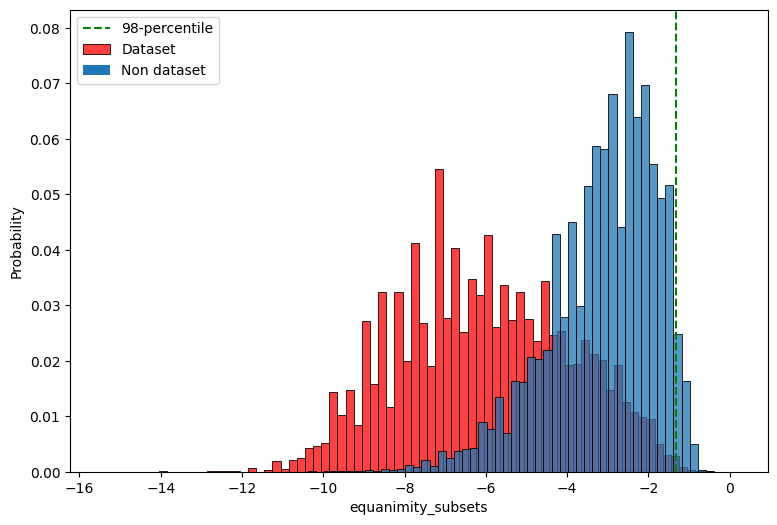

In [35]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df, x='equanimity_subsets', color='red', stat='probability', binwidth=0.2, ax=ax)
sns.histplot(data=non_dataset_df, x='equanimity_subsets', stat='probability', binwidth=0.2, ax=ax)

plt.axvline(x=percentile_equanimity_subsets, color='green', linestyle='--')

ax.legend(labels=['98-percentile', 'Dataset', 'Non dataset'])

plt.show()

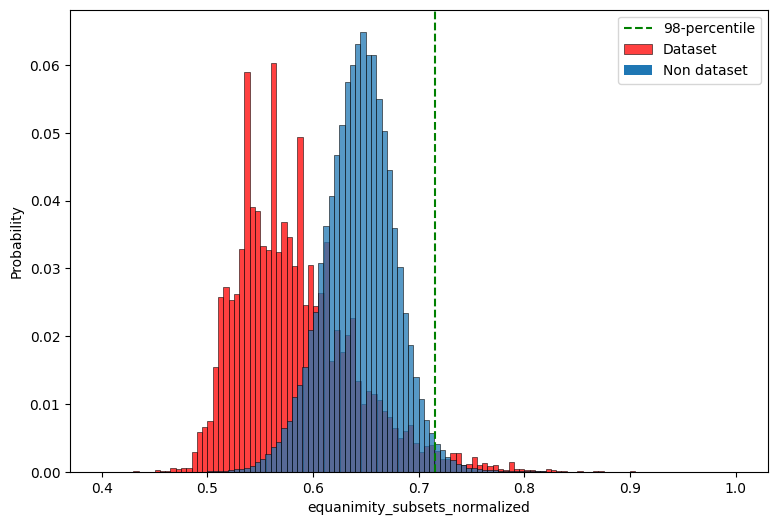

In [38]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df, x='equanimity_subsets_normalized', color='red', stat='probability', binwidth=0.005, ax=ax)
sns.histplot(data=non_dataset_df, x='equanimity_subsets_normalized', stat='probability', binwidth=0.005, ax=ax)

plt.axvline(x=percentile_equanimity_subsets_normalized, color='green', linestyle='--')

ax.legend(labels=['98-percentile', 'Dataset', 'Non dataset'])

plt.show()

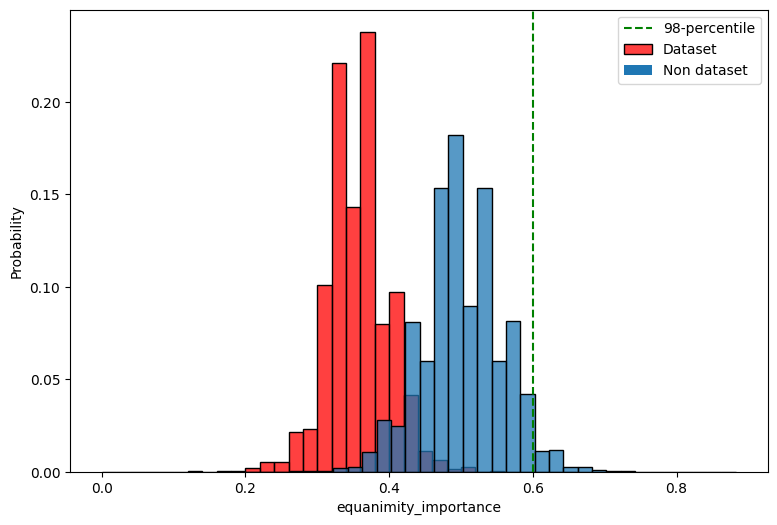

In [40]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df, x='equanimity_importance', color='red', stat='probability', binwidth=0.02, ax=ax)
sns.histplot(data=non_dataset_df, x='equanimity_importance', stat='probability', binwidth=0.02, ax=ax)

plt.axvline(x=percentile_equanimity_importance, color='green', linestyle='--')

ax.legend(labels=['98-percentile', 'Dataset', 'Non dataset'])

plt.show()

Let's see how many functions that have higher values of equanimity than the percentiles showed in the cells above are outside the dataset.

In [6]:
# Filter functions outside the dataset with higher values of equanimity than the 98 percentile
non_dataset_p_98_equanimity_importance = non_dataset_df[non_dataset_df['equanimity_importance'] > percentile_equanimity_importance]
non_dataset_p_98_equanimity_subsets = non_dataset_df[non_dataset_df['equanimity_subsets'] > percentile_equanimity_subsets]
non_dataset_p_98_equanimity_subsets_normalized = non_dataset_df[non_dataset_df['equanimity_subsets_normalized'] > percentile_equanimity_subsets_normalized]

# Calculate the percentage
non_dataset_percentage_equanimity_importance = len(non_dataset_p_98_equanimity_importance) * 100 / len(functions[functions['equanimity_importance'] > percentile_equanimity_importance])
non_dataset_percentage_equanimity_subsets = len(non_dataset_p_98_equanimity_subsets) * 100 / len(functions[functions['equanimity_subsets'] > percentile_equanimity_subsets])
non_dataset_percentage_equanimity_subsets_normalized = len(non_dataset_p_98_equanimity_subsets_normalized) * 100 / len(functions[functions['equanimity_subsets_normalized'] > percentile_equanimity_subsets_normalized])

# Print the results
print('Equanimity based on the importance:', non_dataset_percentage_equanimity_importance)
print('Equanimity based on subsets:', non_dataset_percentage_equanimity_subsets)
print('Equanimity based on subsets normalized:', non_dataset_percentage_equanimity_subsets_normalized)

Equanimity based on the importance: 99.98881431767337
Equanimity based on subsets: 95.15119761691922
Equanimity based on subsets normalized: 37.12759939479404


### 2. Test metrics combined

Let's study how both metrics work together using seaborn heatmaps.

In [84]:
# Calculate the x-axis: Entanglement values
def pivoted_non_dataset(equanimity):
    X = list(set(functions['entanglement']))
    # Calculate the y-axis: Equanimity based on importance values
    Y = np.linspace(min(non_dataset_df[equanimity]), max(non_dataset_df[equanimity]), 10)
    
    # For each pair (x, y) we calculate the percentage of functions inside and outside dataset with higher entanglement and equanimity values than (x, y)
    M_non_dataset = pd.DataFrame(columns=['Entanglement', equanimity, 'Score'])
    for i in range(len(X)):
        for j in range(len(Y)):
            filtered_non_dataset_functions = non_dataset_df[(non_dataset_df['entanglement'] >= X[i]) & (non_dataset_df[equanimity] >= Y[j])]
            filtered_functions = functions[(functions['entanglement'] >= X[i]) & (functions[equanimity] >= Y[j])]
        
            M_non_dataset = M_non_dataset.append({'Entanglement': X[i], 
                                      equanimity: round(Y[j], 2),
                                      'Score': -1 if len(filtered_functions) == 0 else len(filtered_non_dataset_functions) * 100 / len(filtered_functions)}, ignore_index=True)
    
    return M_non_dataset.pivot('Entanglement', equanimity, 'Score').sort_values(by='Entanglement', ascending=False)

C:\Users\Enrique\AppData\Local\Temp\ipykernel_18276\1457957975.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_dataset = M_dataset.pivot('Entanglement', 'Equanimity based on importance', 'Score')


<Axes: xlabel='Equanimity based on importance', ylabel='Entanglement'>

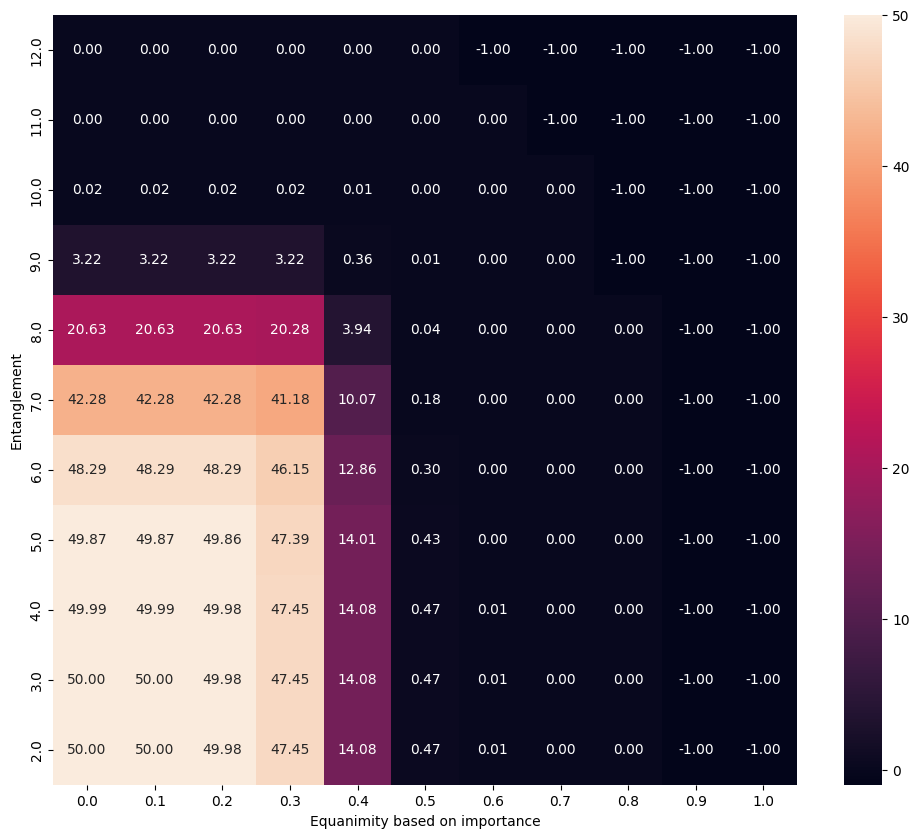

In [69]:
# Plot the heat map for the dataset
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(pivoted_non_dataset('equanimity_importance'), annot=True, fmt='.2f')


C:\Users\Enrique\AppData\Local\Temp\ipykernel_18276\686407466.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_non_dataset = M_non_dataset.pivot('Entanglement', 'Equanimity based on importance', 'Score')


<Axes: xlabel='Equanimity based on importance', ylabel='Entanglement'>

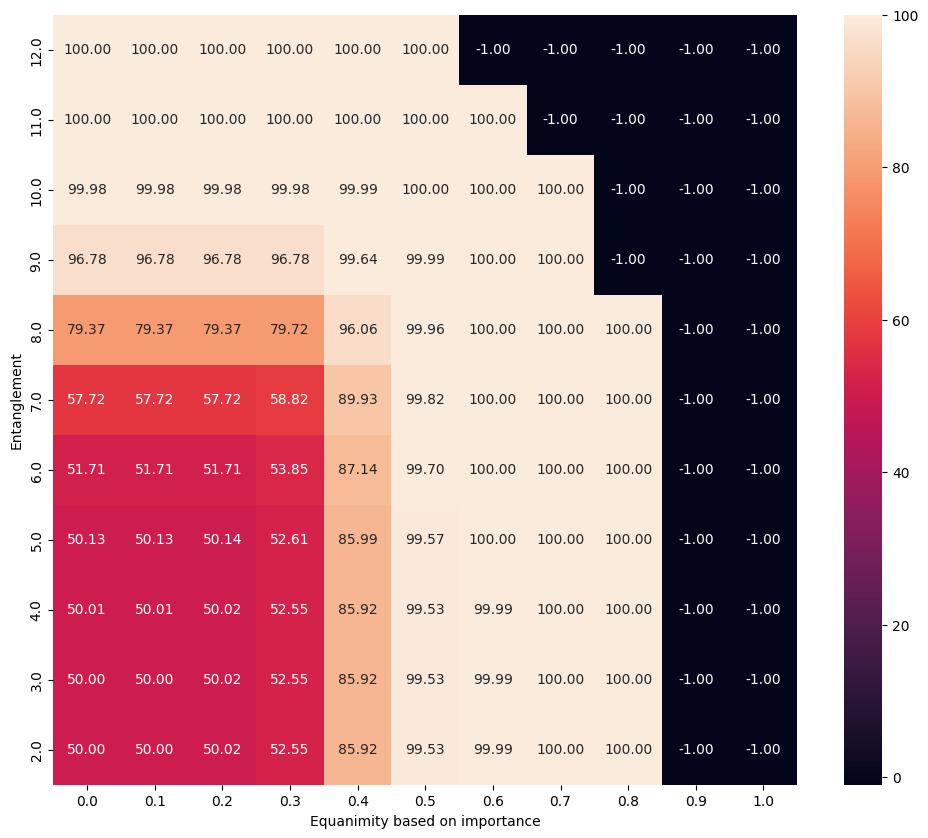

In [73]:
# Plot the heat map for the dataset
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(pivoted_non_dataset('equanimity_importance'), annot=True, fmt='.2f')

C:\Users\Enrique\AppData\Local\Temp\ipykernel_18276\1800208755.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M_non_dataset = M_non_dataset.append({'Entanglement': X[i],
C:\Users\Enrique\AppData\Local\Temp\ipykernel_18276\1800208755.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M_non_dataset = M_non_dataset.append({'Entanglement': X[i],
C:\Users\Enrique\AppData\Local\Temp\ipykernel_18276\1800208755.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M_non_dataset = M_non_dataset.append({'Entanglement': X[i],
C:\Users\Enrique\AppData\Local\Temp\ipykernel_18276\1800208755.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

<Axes: xlabel='equanimity_subsets', ylabel='Entanglement'>

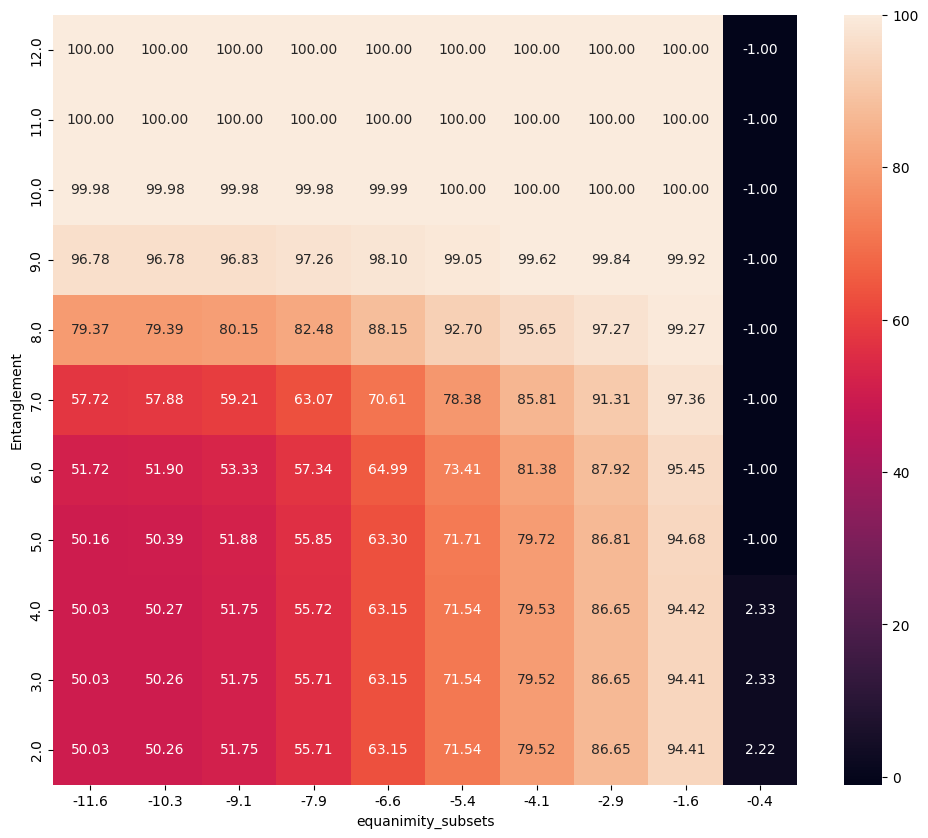

In [79]:
# Plot the heat map for the dataset
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(pivoted_non_dataset('equanimity_subsets'), annot=True, fmt='.2f')

<Axes: xlabel='equanimity_subsets_normalized', ylabel='Entanglement'>

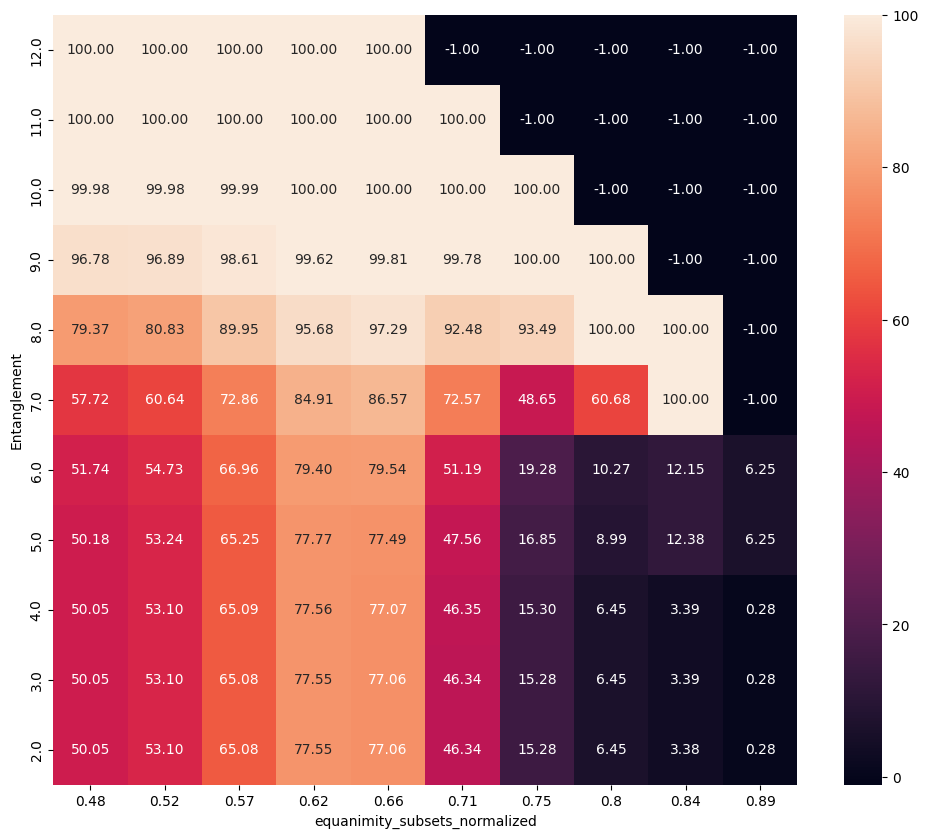

In [85]:
# Plot the heat map for the dataset
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(pivoted_non_dataset('equanimity_subsets_normalized'), annot=True, fmt='.2f')

Secondly, we would like to know how the percentiles calculated in the first section works if we add the entanglement metric.

In [7]:
# Filter functions outside the dataset with higher values of equanimity than the 98 percentile
non_dataset_p_98_equanimity_importance = non_dataset_df[non_dataset_df['equanimity_importance'] > percentile_equanimity_importance]
non_dataset_p_98_equanimity_subsets = non_dataset_df[non_dataset_df['equanimity_subsets'] > percentile_equanimity_subsets]
non_dataset_p_98_equanimity_subsets_normalized = non_dataset_df[non_dataset_df['equanimity_subsets_normalized'] > percentile_equanimity_subsets_normalized]

# Filter functions inside the dataset with higher values of equanimity than the 98 percentile
dataset_p_98_equanimity_importance = dataset_df[dataset_df['equanimity_importance'] > percentile_equanimity_importance]
dataset_p_98_equanimity_subsets = dataset_df[dataset_df['equanimity_subsets'] > percentile_equanimity_subsets]
dataset_p_98_equanimity_subsets_normalized = dataset_df[dataset_df['equanimity_subsets_normalized'] > percentile_equanimity_subsets_normalized]

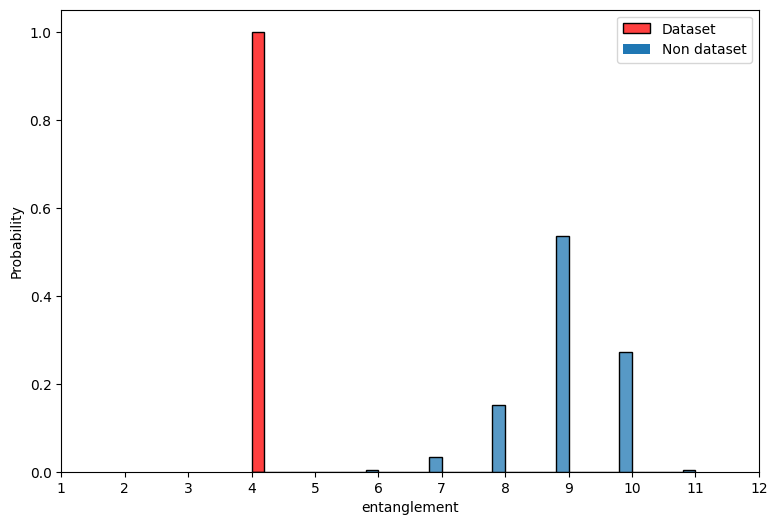

In [8]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_p_98_equanimity_importance, x='entanglement', color='red', stat='probability', binwidth=0.2, ax=ax)
sns.histplot(data=non_dataset_p_98_equanimity_importance, x='entanglement', stat='probability', binwidth=0.2, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])
ax.set_xticks(np.arange(1, 13, 1))

plt.show()

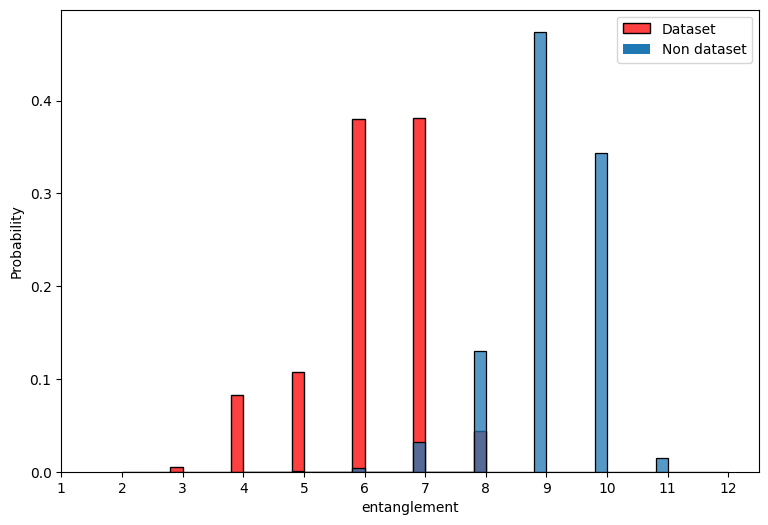

In [11]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_p_98_equanimity_subsets, x='entanglement', color='red', stat='probability', binwidth=0.2, ax=ax)
sns.histplot(data=non_dataset_p_98_equanimity_subsets, x='entanglement', stat='probability', binwidth=0.2, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])
ax.set_xticks(np.arange(1, 13, 1))

plt.show()

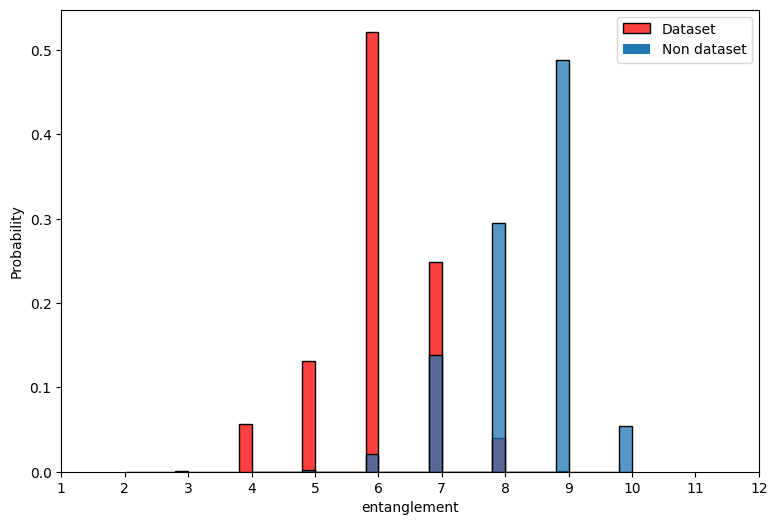

In [12]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_p_98_equanimity_subsets_normalized, x='entanglement', color='red', stat='probability', binwidth=0.2, ax=ax)
sns.histplot(data=non_dataset_p_98_equanimity_subsets_normalized, x='entanglement', stat='probability', binwidth=0.2, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])
ax.set_xticks(np.arange(1, 13, 1))

plt.show()

### 3. Test benchmarks